In [1]:
%matplotlib inline

import pickle
import numpy as np
from pathlib import Path

from BCModel import BCModel

env_name = 'Humanoid-v2'

In [2]:
data_path = Path('./expert_data/')
def load_data_from_pickle(envname):
    file_path = data_path / (envname + '.pkl')
    with open(file_path.resolve(), 'rb') as f:
        data = pickle.load(f)
    return data

In [3]:
data = load_data_from_pickle(env_name)
train_inputs = data['observations']
train_outputs = data['actions']
train_outputs = np.reshape(train_outputs, (train_outputs.shape[0], train_outputs.shape[2]))
print('train_inputs shape is: ', train_inputs.shape)
print('train_outputs shape is: ', train_outputs.shape)

train_inputs shape is:  (20000, 376)
train_outputs shape is:  (20000, 17)


In [4]:
model_params = {
    'env_name': env_name,
    'input_dim': train_inputs.shape[1],
    'output_dim': train_outputs.shape[1],
    'learning_rate': 5e-4,
    'batch_size': 256
}

model = BCModel(**model_params)
model.build()

In [7]:
epochs = []
losses = []
mean_returns = []
for epoch in range(400 + 1):
    batch = model.generate_batch(train_inputs, train_outputs)
    loss = model.train_on_batch(*batch)
    if epoch % 20 == 0:
        returns = model.evaluate_reward()
        epochs.append(epoch)
        losses.append(loss)
        mean_returns.append(np.mean(returns))

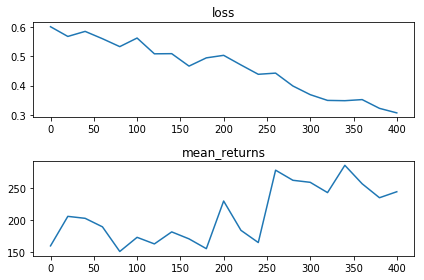

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(211)
plt.title('loss')
plt.plot(epochs, losses)

plt.subplot(212)
plt.title('mean_returns')
plt.plot(epochs, mean_returns)
plt.tight_layout()